In [1]:
import pandas as pd
import numpy as np
import datetime
from dateutil.parser import parse
from fbprophet import Prophet
from matplotlib import pyplot as plt
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [2]:
csv_path = 'file:///Users/Stefan/Downloads/video_game_sales.csv'
project_data = pd.read_csv(csv_path)
project_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
csv_path1 = 'file:///Users/Stefan/Desktop/updatedrealeaseyear.csv'
release_date = pd.read_csv(csv_path1)
release_date = release_date[release_date['Year'] != 'N/A  ']
release_date.head()

,Year
0,11/19/2006
1,10/18/1985
2,4/27/2008
3,7/26/2009
4,9/30/1998


In [4]:
df1 = project_data.iloc[:,10].mul(1000000)
df2 = pd.DataFrame(df1, dtype=int)
del project_data['Global_Sales']
final_data = pd.merge(project_data, df2, left_index=True, right_index=True)
final_data.head()
# converting the global sales value into the millions and updating the dtype to millions

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82740000
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40240000
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35820000
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33000000
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31370000


In [5]:
final_data.update(release_date)
final_data
# reducing the data into the two column format for the utilization of the prophet function

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,11/19/2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82740000
1,2,Super Mario Bros.,NES,10/18/1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40240000
2,3,Mario Kart Wii,Wii,4/27/2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35820000
3,4,Wii Sports Resort,Wii,7/26/2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33000000
4,5,Pokemon Red/Pokemon Blue,GB,9/30/1998,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31370000
5,6,Tetris,GB,6/1/1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30260000
6,7,New Super Mario Bros.,DS,5/15/2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30010000
7,8,Wii Play,Wii,2/12/2007,Misc,Nintendo,14.03,9.20,2.93,2.85,29020000
8,9,New Super Mario Bros. Wii,Wii,11/15/2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28620000
9,10,Duck Hunt,NES,10/15/1985,Shooter,Nintendo,26.93,0.63,0.28,0.47,28310000


In [6]:
final_data['Year'] = pd.to_datetime(final_data['Year'])
final_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-11-19,Sports,Nintendo,41.49,29.02,3.77,8.46,82740000
1,2,Super Mario Bros.,NES,1985-10-18,Platform,Nintendo,29.08,3.58,6.81,0.77,40240000
2,3,Mario Kart Wii,Wii,2008-04-27,Racing,Nintendo,15.85,12.88,3.79,3.31,35820000
3,4,Wii Sports Resort,Wii,2009-07-26,Sports,Nintendo,15.75,11.01,3.28,2.96,33000000
4,5,Pokemon Red/Pokemon Blue,GB,1998-09-30,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31370000
5,6,Tetris,GB,1989-06-01,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30260000
6,7,New Super Mario Bros.,DS,2006-05-15,Platform,Nintendo,11.38,9.23,6.50,2.90,30010000
7,8,Wii Play,Wii,2007-02-12,Misc,Nintendo,14.03,9.20,2.93,2.85,29020000
8,9,New Super Mario Bros. Wii,Wii,2009-11-15,Platform,Nintendo,14.59,7.06,4.70,2.26,28620000
9,10,Duck Hunt,NES,1985-10-15,Shooter,Nintendo,26.93,0.63,0.28,0.47,28310000


In [7]:
df3 = final_data.rename(columns={'Year':'ds','Global_Sales':'y'})
df4 = df3.dropna()
df4['ds'] = df4['ds']
df4.head()
# changing the column names for prophet and updating the dtype of column 1 to an integer

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rank,Name,Platform,ds,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,y
0,1,Wii Sports,Wii,2006-11-19,Sports,Nintendo,41.49,29.02,3.77,8.46,82740000
1,2,Super Mario Bros.,NES,1985-10-18,Platform,Nintendo,29.08,3.58,6.81,0.77,40240000
2,3,Mario Kart Wii,Wii,2008-04-27,Racing,Nintendo,15.85,12.88,3.79,3.31,35820000
3,4,Wii Sports Resort,Wii,2009-07-26,Sports,Nintendo,15.75,11.01,3.28,2.96,33000000
4,5,Pokemon Red/Pokemon Blue,GB,1998-09-30,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31370000


In [8]:
df5 = df4['ds']
df6 = df4['y']
df = pd.concat([df5,df6], axis=1, sort=False)
df
# formulating the ds column to match the required datetime setting

,ds,y
0,2006-11-19,82740000
1,1985-10-18,40240000
2,2008-04-27,35820000
3,2009-07-26,33000000
4,1998-09-30,31370000
5,1989-06-01,30260000
6,2006-05-15,30010000
7,2007-02-12,29020000
8,2009-11-15,28620000
9,1985-10-15,28310000


In [9]:
# log transform the y column to convert non-stationary data to stationary data

df['y'] = np.log(df['y'])
df

,ds,y
0,2006-11-19,18.231214
1,1985-10-18,17.510372
2,2008-04-27,17.394017
3,2009-07-26,17.312018
4,1998-09-30,17.261363
5,1989-06-01,17.225337
6,2006-05-15,17.217041
7,2007-02-12,17.183496
8,2009-11-15,17.169616
9,1985-10-15,17.158726


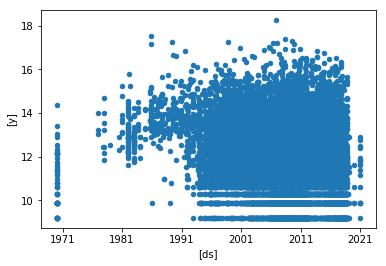

In [10]:
df.plot.scatter(['ds'], ['y'])


In [11]:
model = Prophet()
model.fit(df);

/anaconda2/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [12]:
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,1970-01-01 00:00:00.000000000,12.363796,12.363796,12.363796,10.146396,13.744220,-0.410096,-0.410096,-0.410096,0.871219,...,0.0,0.0,0.0,-0.874055,-0.874055,-0.874055,-0.407261,-0.407261,-0.407261,11.953700
1,1970-01-01 00:00:00.000000000,12.363796,12.363796,12.363796,10.226815,13.797620,-0.410096,-0.410096,-0.410096,0.871219,...,0.0,0.0,0.0,-0.874055,-0.874055,-0.874055,-0.407261,-0.407261,-0.407261,11.953700
2,1970-01-01 00:00:00.000000000,12.363796,12.363796,12.363796,10.332480,13.590423,-0.410096,-0.410096,-0.410096,0.871219,...,0.0,0.0,0.0,-0.874055,-0.874055,-0.874055,-0.407261,-0.407261,-0.407261,11.953700
3,1970-01-01 00:00:00.000000000,12.363796,12.363796,12.363796,10.254439,13.692727,-0.410096,-0.410096,-0.410096,0.871219,...,0.0,0.0,0.0,-0.874055,-0.874055,-0.874055,-0.407261,-0.407261,-0.407261,11.953700
4,1970-01-01 00:00:00.000001994,12.363796,12.363796,12.363796,10.098762,13.686733,-0.410096,-0.410096,-0.410096,0.871219,...,0.0,0.0,0.0,-0.874055,-0.874055,-0.874055,-0.407261,-0.407261,-0.407261,11.953700
5,1970-01-01 00:00:00.000001996,12.363796,12.363796,12.363796,10.159747,13.665499,-0.410096,-0.410096,-0.410096,0.871219,...,0.0,0.0,0.0,-0.874055,-0.874055,-0.874055,-0.407261,-0.407261,-0.407261,11.953700
6,1970-01-01 00:00:00.000002001,12.363796,12.363796,12.363796,10.188312,13.753389,-0.410096,-0.410096,-0.410096,0.871219,...,0.0,0.0,0.0,-0.874055,-0.874055,-0.874055,-0.407261,-0.407261,-0.407261,11.953700
7,1970-01-01 00:00:00.000002001,12.363796,12.363796,12.363796,10.159515,13.705540,-0.410096,-0.410096,-0.410096,0.871219,...,0.0,0.0,0.0,-0.874055,-0.874055,-0.874055,-0.407261,-0.407261,-0.407261,11.953700
8,1970-01-01 00:00:00.000002002,12.363796,12.363796,12.363796,10.190298,13.756444,-0.410096,-0.410096,-0.410096,0.871219,...,0.0,0.0,0.0,-0.874055,-0.874055,-0.874055,-0.407261,-0.407261,-0.407261,11.953700
9,1970-01-01 00:00:00.000002002,12.363796,12.363796,12.363796,10.326762,13.713261,-0.410096,-0.410096,-0.410096,0.871219,...,0.0,0.0,0.0,-0.874055,-0.874055,-0.874055,-0.407261,-0.407261,-0.407261,11.953700


INFO:fbprophet.diagnostics:Making 8 forecasts with cutoffs between 2005-01-04 00:00:00 and 2019-01-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-01-07,11.291293,9.567937,13.052537,11.512925,2005-01-04
1,2005-01-09,11.827064,10.071493,13.530838,9.903488,2005-01-04
2,2005-01-10,12.027748,10.361630,13.652794,12.873902,2005-01-04
3,2005-01-10,12.027748,10.395475,13.734508,13.270783,2005-01-04
4,2005-01-10,12.027748,10.185279,13.677106,14.108180,2005-01-04


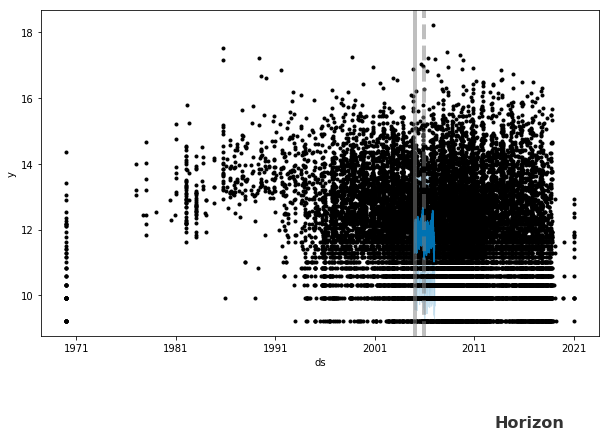

In [13]:
df_cv = cross_validation(
    model, '730 days', initial='12775 days', period='730 days')
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'].values, model.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')
ax.text(x=pd.to_datetime('2010-01-01'),y=12, s='Initial', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.text(x=pd.to_datetime('2012-01-01'),y=12, s='Cutoff', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.axvline(x=pd.to_datetime(cutoff) + pd.Timedelta('365 days'), c='gray', lw=4,
           alpha=0.5, ls='--')
ax.text(x=pd.to_datetime('2013-01-01'),y=6, s='Horizon', color='black',
       fontsize=16, fontweight='bold', alpha=0.8);
df_cv.head()

In [14]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
168,92 days,1.894659,1.376466,1.124629,0.092914,0.767442
167,92 days,1.894704,1.376483,1.124727,0.092922,0.767442
169,92 days,1.877494,1.370217,1.118544,0.092189,0.773256
174,96 days,1.873368,1.368710,1.114088,0.091846,0.773256
175,97 days,1.871396,1.367990,1.113246,0.091785,0.773256


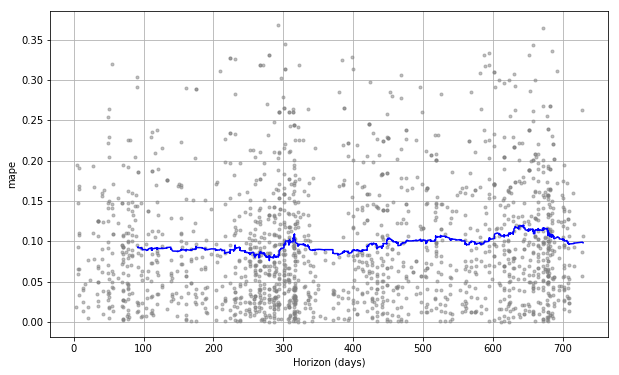

In [15]:
fig = plot_cross_validation_metric(df_cv, metric='mape')